In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.9.1
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.4.3
numpy 1.20.3
pandas 1.3.4
sklearn 0.24.2
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [2]:
train_file = "./data/titanic/train.csv"
eval_file = "./data/titanic/eval.csv"
train_df = pd.read_csv(train_file)
eval_df = pd.read_csv(eval_file)
print(train_df.head())
print(eval_df.head())
print(train_df.shape)
print(eval_df.shape)


   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
   survived     sex   age  n_siblings_spouses  parch     fare   class  \
0         0    male  35.0                   0      0   8.0500   Third   
1         0    male  54.0                   0      0  51.8625   First   
2         1  female  58.0                   0      0  26.5500   First   
3         1  female  55.0                   0      0  16.0000  Second   
4         

In [3]:
#pop取数据后 原来位置的数据消失
y_train = train_df.pop('survived')
y_eval = eval_df.pop('survived')
print(train_df.head())
print('-'*50)
print(eval_df.head())
print('-'*50)
print(y_train.head())
print('-'*50)
print(y_eval.head())


      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
--------------------------------------------------
      sex   age  n_siblings_spouses  parch     fare   class     deck  \
0    male  35.0                   0      0   8.0500   Third  unknown   
1    male  54.0                   0      0  51.8625   First        E   
2  female  58.0                   0      0  26.5500   First        C   
3  female  55.0                   0      0  16.0000  Second  unknown   
4    male  34.0         

In [4]:
train_df.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [5]:
train_df.describe(include='object')

,sex,class,deck,embark_town,alone
count,627,627,627,627,627
unique,2,3,8,4,2
top,male,Third,unknown,Southampton,y
freq,410,341,481,450,372


In [6]:
print(train_df.shape, eval_df.shape)

(627, 9) (264, 9)


<AxesSubplot:>

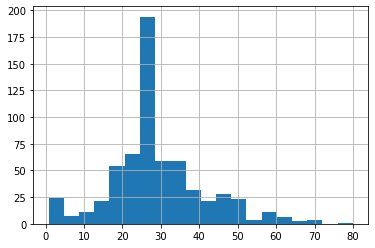

In [7]:
train_df.age.hist(bins = 20)

<AxesSubplot:>

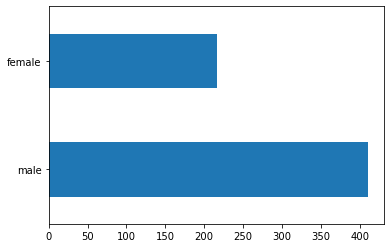

In [10]:
train_df.sex.value_counts().plot(kind='barh')

In [11]:

train_df.alone    

0      n
1      n
2      y
3      n
4      y
      ..
622    y
623    y
624    y
625    n
626    y
Name: alone, Length: 627, dtype: object

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


<AxesSubplot:>

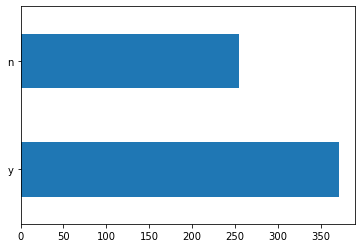

In [14]:
train_df.alone.value_counts().plot(kind='barh')

<AxesSubplot:>

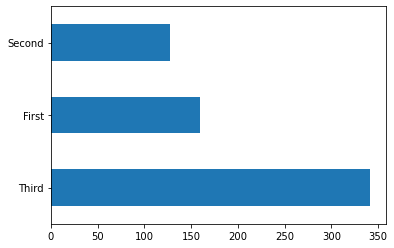

In [18]:
train_df['class'].value_counts().plot(kind='barh')

C:\Users\gdmmx\AppData\Local\Temp/ipykernel_4368/2184565294.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_age[df_age.age>30][df_age.age<50].groupby('age').survived.mean().plot(kind='barh')


<AxesSubplot:ylabel='age'>

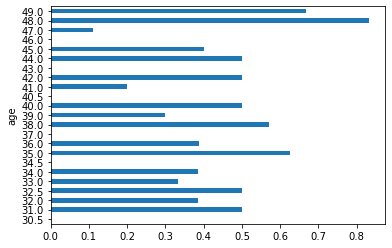

In [20]:
df_age=pd.concat([train_df,y_train],axis=1)
df_age[df_age.age>30][df_age.age<50].groupby('age').survived.mean().plot(kind='barh')

In [22]:
train_df['sex'].unique()

array(['male', 'female'], dtype=object)

In [29]:
categorical_columns = ['sex', 'n_siblings_spouses', 'parch', 'class',
                       'deck', 'embark_town', 'alone']
numeric_columns = ['age', 'fare']
feature_columns = []
for categorical_column in categorical_columns:
    vocab=train_df[categorical_column].unique()
    print(categorical_column,vocab)
    feature_columns.append(tf.feature_column.indicator_column(
        tf.feature_column.categorical_column_with_vocabulary_list(
            categorical_column,vocab)))
for categorical_column in numeric_columns:
    feature_columns.append(
            tf.feature_column.numeric_column(
                categorical_column,dtype=tf.float32))
feature_columns

sex ['male' 'female']
n_siblings_spouses [1 0 3 4 2 5 8]
parch [0 1 2 5 3 4]
class ['Third' 'First' 'Second']
deck ['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
embark_town ['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
alone ['n' 'y']


[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town',

In [30]:
dict(train_df)
train_df

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,female,19.0,0,0,30.0000,First,B,Southampton,y
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [31]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

In [33]:
def make_dataset(data_df,label_df,epochs=10,shuffle=True,batch_size=32):
    dataset=tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
    if shuffle:
        dataset=dataset.shuffle(10000)
    dataset=dataset.repeat(epochs).batch(batch_size)
    return dataset


In [34]:
train_dataset=make_dataset(train_df,y_train,batch_size=5)
for x,y in train_dataset.take(1):
    print(x)
    print('-'*50)
    print(y)

{'sex': <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'female', b'female', b'male', b'female', b'male'], dtype=object)>, 'age': <tf.Tensor: shape=(5,), dtype=float64, numpy=array([51., 28., 28., 50., 29.])>, 'n_siblings_spouses': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 1, 0, 0, 0], dtype=int64)>, 'parch': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 0, 0], dtype=int64)>, 'fare': <tf.Tensor: shape=(5,), dtype=float64, numpy=array([77.9583, 15.5   , 29.7   , 28.7125,  9.4833])>, 'class': <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'First', b'Third', b'First', b'First', b'Third'], dtype=object)>, 'deck': <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'D', b'unknown', b'C', b'C', b'unknown'], dtype=object)>, 'embark_town': <tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'Southampton', b'Queenstown', b'Cherbourg', b'Cherbourg',
       b'Southampton'], dtype=object)>, 'alone': <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'n', b'n', b'

In [36]:
for x,y in train_dataset.take(1):
    age_column=feature_columns[7]
    gender_column=feature_columns[0]
    print(age_column)
    print(gender_column)
    print(keras.layers.DenseFeatures(age_column)(x).numpy())
    print(keras.layers.DenseFeatures(gender_column)(x))

NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0))
[[40.]
 [29.]
 [ 1.]
 [28.]
 [44.]]
tf.Tensor(
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]], shape=(5, 2), dtype=float32)


In [37]:
for x, y in train_dataset.take(1):#拿第一个batch
    print(keras.layers.DenseFeatures(feature_columns)(x))

tf.Tensor(
[[22.      0.      1.      1.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      0.      0.      1.      0.      0.
   7.2292  0.      1.      0.      0.      0.      0.      0.      1.
   0.      0.      0.      0.      0.      1.      0.    ]
 [19.      0.      1.      0.      1.      0.      0.      0.      0.
   0.      1.      0.      0.      0.      1.      0.      0.      0.
  30.      0.      1.      0.      0.      0.      0.      0.      1.
   0.      0.      0.      0.      0.      0.      1.    ]
 [28.      0.      1.      1.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      0.      1.      0.      0.      0.
   8.6625  0.      1.      0.      0.      0.      0.      0.      1.
   0.      0.      0.      0.      0.      1.      0.    ]
 [28.      1.      0.      1.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      0.      1.      0.      0.      0.
  25.4667  0.      0.      1.      0.     

In [40]:
model=keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.005),metrics=['accuracy'])
model.layers

In [42]:
train_dataset=make_dataset(train_df,y_train,epochs=100)
eval_dataset=make_dataset(eval_df,y_eval,epochs=100,shuffle=False)
history=model.fit(train_dataset,validation_data=eval_dataset,steps_per_epoch=19,validation_steps=8,epochs=100)


Epoch 1/100
19/19 [==============================] - 2s 27ms/step - loss: 1.3769 - accuracy: 0.5411 - val_loss: 1.5309 - val_accuracy: 0.6250
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.9741 - accuracy: 0.6349 - val_loss: 0.6284 - val_accuracy: 0.6680
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 0.7948 - accuracy: 0.6316 - val_loss: 0.6083 - val_accuracy: 0.7070
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 0.7191 - accuracy: 0.6266 - val_loss: 0.7388 - val_accuracy: 0.6836
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6799 - accuracy: 0.6694 - val_loss: 0.6189 - val_accuracy: 0.6562
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6366 - accuracy: 0.6546 - val_loss: 0.7472 - val_accuracy: 0.6680
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6788 - accuracy: 0.6513 - val_loss: 0.6579 - val_accuracy: 0.6406
Epoch 8/100


19/19 [==============================] - 0s 5ms/step - loss: 0.5529 - accuracy: 0.7352 - val_loss: 0.5389 - val_accuracy: 0.6953
Epoch 42/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5474 - accuracy: 0.7253 - val_loss: 0.5591 - val_accuracy: 0.7070
Epoch 43/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5598 - accuracy: 0.7188 - val_loss: 0.5373 - val_accuracy: 0.7188
Epoch 44/100
19/19 [==============================] - 0s 6ms/step - loss: 0.5382 - accuracy: 0.7434 - val_loss: 0.5381 - val_accuracy: 0.6992
Epoch 45/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5486 - accuracy: 0.7336 - val_loss: 0.6052 - val_accuracy: 0.7109
Epoch 46/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5657 - accuracy: 0.7171 - val_loss: 0.5495 - val_accuracy: 0.7227
Epoch 47/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5893 - accuracy: 0.7105 - val_loss: 0.5521 - val_accuracy: 0.6953
Epoch 48/100
19/19 

Epoch 99/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5144 - accuracy: 0.7664 - val_loss: 0.5346 - val_accuracy: 0.7266
Epoch 100/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4758 - accuracy: 0.7780 - val_loss: 0.5165 - val_accuracy: 0.7383


In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_features_7 (DenseFeat  multiple                 0         
 ures)                                                           
                                                                 
 dense_6 (Dense)             multiple                  3500      
                                                                 
 dense_7 (Dense)             multiple                  10100     
                                                                 
 dense_8 (Dense)             multiple                  202       
                                                                 
Total params: 13,802
Trainable params: 13,802
Non-trainable params: 0
_________________________________________________________________


In [45]:
type(train_df)

pandas.core.frame.DataFrame

In [46]:
type(y_train)

pandas.core.series.Series

In [47]:
!ls

data
estimator.ipynb


In [48]:
!nvidia-smi

Sat Jul 30 11:12:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 496.13       Driver Version: 496.13       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P8    N/A /  N/A |     37MiB /  2048MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [76]:
!rm -rf linear_model

In [77]:
linear_output_dir = 'linear_model'
if not os.path.exists(linear_output_dir):
    os.mkdir(linear_output_dir)

In [78]:
linear_estimator=tf.estimator.LinearClassifier(
    model_dir=linear_output_dir,
    n_classes=2,
    feature_columns=feature_columns)
linear_estimator.train(input_fn=lambda :make_dataset(train_df,y_train,epochs=100))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'linear_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorf

In [52]:
linear_estimator.get_variable_names()

['global_step',
 'linear/linear_model/age/weights',
 'linear/linear_model/alone_indicator/weights',
 'linear/linear_model/bias_weights',
 'linear/linear_model/class_indicator/weights',
 'linear/linear_model/deck_indicator/weights',
 'linear/linear_model/embark_town_indicator/weights',
 'linear/linear_model/fare/weights',
 'linear/linear_model/n_siblings_spouses_indicator/weights',
 'linear/linear_model/parch_indicator/weights',
 'linear/linear_model/sex_indicator/weights',
 'training/Ftrl/beta',
 'training/Ftrl/decay',
 'training/Ftrl/l1_regularization_strength',
 'training/Ftrl/l2_regularization_strength',
 'training/Ftrl/learning_rate',
 'training/Ftrl/learning_rate_power',
 'training/Ftrl/linear/linear_model/age/weights/accumulator',
 'training/Ftrl/linear/linear_model/age/weights/linear',
 'training/Ftrl/linear/linear_model/alone_indicator/weights/accumulator',
 'training/Ftrl/linear/linear_model/alone_indicator/weights/linear',
 'training/Ftrl/linear/linear_model/bias_weights/accu

In [53]:
linear_estimator.get_variable_value('global_step')

1960

In [54]:

linear_estimator.get_variable_value('training/Ftrl/linear/linear_model/parch_indicator/weights/linear')


array([[-1.2676529],
       [-2.926952 ],
       [-1.4845878],
       [ 1.1337913],
       [-0.9145758],
       [ 2.1332996]], dtype=float32)

In [55]:
!ls -l linear_model


total 4883
-rw-r--r-- 1 娣辩埍涓讳箟 197121     130  7鏈� 30 11:56 checkpoint
-rw-r--r-- 1 娣辩埍涓讳箟 197121 1369067  7鏈� 30 11:56 events.out.tfevents.1659153357.DESKTOP-D5RCLAE
-rw-r--r-- 1 娣辩埍涓讳箟 197121  948896  7鏈� 30 11:55 graph.pbtxt
-rw-r--r-- 1 娣辩埍涓讳箟 197121     452  7鏈� 30 11:55 model.ckpt-0.data-00000-of-00001
-rw-r--r-- 1 娣辩埍涓讳箟 197121    1749  7鏈� 30 11:55 model.ckpt-0.index
-rw-r--r-- 1 娣辩埍涓讳箟 197121  380781  7鏈� 30 11:55 model.ckpt-0.meta
-rw-r--r-- 1 娣辩埍涓讳箟 197121     452  7鏈� 30 11:56 model.ckpt-1960.data-00000-of-00001
-rw-r--r-- 1 娣辩埍涓讳箟 197121    1749  7鏈� 30 11:56 model.ckpt-1960.index
-rw-r--r-- 1 娣辩埍涓讳箟 197121  380781  7鏈� 30 11:56 model.ckpt-1960.meta


In [56]:
linear_estimator.evaluate(input_fn = lambda : make_dataset(
    eval_df, y_eval, epochs = 1, shuffle = False))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-07-30T11:57:36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from linear_model\model.ckpt-1960
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.87471s
INFO:tensorflow:Finished evaluation at 2022-07-30-11:57:37
INFO:tensorflow:Saving dict for global step 1960: accuracy = 0.780303, accuracy_baseline = 0.625, auc = 0.8390266, auc_precision_recall = 0.7885479, average_loss = 0.47160357, global_step = 1960, label/mean = 0.375, loss = 0.4552045, precision = 0.69902915, prediction/mean = 0.40700546, recall = 0.72727275
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1960: linear_model\model.ckpt-1960


{'accuracy': 0.780303,
 'accuracy_baseline': 0.625,
 'auc': 0.8390266,
 'auc_precision_recall': 0.7885479,
 'average_loss': 0.47160357,
 'label/mean': 0.375,
 'loss': 0.4552045,
 'precision': 0.69902915,
 'prediction/mean': 0.40700546,
 'recall': 0.72727275,
 'global_step': 1960}

In [82]:
!rm -rf dnn_model

In [83]:
dnn_output_dir = './dnn_model'
if not os.path.exists(dnn_output_dir):
    os.mkdir(dnn_output_dir)


In [84]:
dnn_estimator = tf.estimator.DNNClassifier(
    model_dir = dnn_output_dir,
    n_classes = 2,
    feature_columns=feature_columns,
    hidden_units = [128, 128,128],
    activation_fn = tf.nn.relu,
    optimizer = 'Adam')
dnn_estimator.train(input_fn = lambda : make_dataset(train_df, y_train, epochs = 100))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './dnn_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorfl

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd5 in position 143: invalid continuation byte